# Notebook for comparison beween  Gevolution and class and agreement between class and hi-class

In [1]:
import numpy as np
import matplotlib.pylab as plt
from scipy.interpolate import interp1d
from pylab import rcParams
import scipy.integrate as integrate
ColorsI = ["red","blue","green","purple","darkcyan","gold","maroon","black","darkslategrey",
           "darkgreen","navy","indigo","magenta","salmon","dodgerblue","springgreen","plum",
           "cyan","khaki","lightcoral","gray"]
ColorsII = []

# plt.style.use('seaborn-paper')
plt.rcParams['font.serif'] = 'Ubuntu'

In [27]:

# #power

addressGev_ndgp_screen="./CSCS_Results/Run_nDGP_screen/output";
addressGev_ndgp="CSCS_Results/Results_nDGP/output"
addressGev_lcdm="CSCS_Results/Results_LCDM/output"

# addressGev_ndgp_screen="Results_nDGP_screened";
# addressGev_ndgp="./Results_nDGP"
# addressGev_lcdm="Results_LCDM"

pow_GR_delta_z_all=[]
pow_ndgp_delta_z_all=[]
pow_ndgp_screen_delta_z_all=[]

Bg_ndgp=np.loadtxt("./"+addressGev_ndgp+"/ndgp_background.dat")
Bg_ndgp_screen =np.loadtxt("./"+addressGev_ndgp_screen+"/ndgp_screen_background.dat")

z_list=[100,50, 30, 10, 3, 1, 0]
maxNum=np.shape(z_list)[0]
for i in range (0,maxNum):
    pow_ndgp_delta_z_all.append(np.loadtxt("./"+addressGev_ndgp+"/ndgp_pk"+str(i).zfill(3)+"_delta.dat"))
    
    pow_ndgp_screen_delta_z_all.append(np.loadtxt("./"+addressGev_ndgp_screen+"/ndgp_pk_screen"+str(i).zfill(3)+"_delta.dat"))
    
    pow_GR_delta_z_all.append(np.loadtxt("./"+addressGev_lcdm+"/lcdm_newt_pk"+str(i).zfill(3)+"_delta.dat"))
    

# DGP Background 

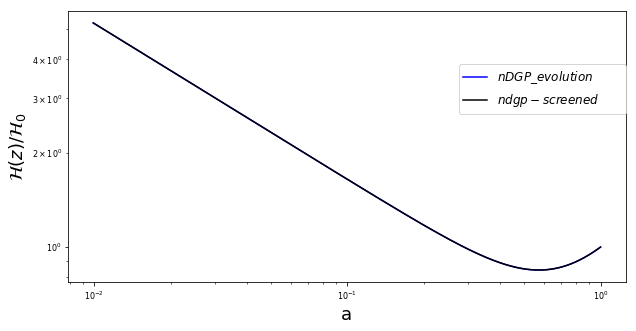

In [28]:
def Hubble_conf_Mpc_ndgp(a):
    h=0.67556;c=2.99792458*1.e5;H0=100.*h/c;Omega_DGP=0.11289;
    Omega_b=0.022032/h/h; Omega_cdm=0.12038/h/h;
    Omega_m=Omega_b+Omega_cdm; Omega_Lambda=0.0;
    Omega_rad=9.1671353942930788e-05; 
    return H0* (np.sqrt(Omega_DGP) +np.sqrt(Omega_DGP + Omega_m*(a**-3)+Omega_rad*(a**-4)) )*a
alist=np.arange(0, 100, 0.005)
h=0.67556;c=2.99792458*1.e5;H0=100.*h/c;
plt.figure(figsize=(10,5))
ax = plt.gca()
ax.tick_params(axis = 'both', which = 'major', labelsize = 8)
ax.tick_params(axis = 'both', which = 'minor', labelsize = 8)

#*******************
#Subplot I
# plt.subplot(211)
plt.figure(1)
# plt.loglog(Bg_ndgp[:,2],Hubble_conf_Mpc_ndgp(Bg_ndgp[:,2])/H0,color="red",linestyle='solid',lw=1.5,label=r"$DGP\_formula$")

plt.loglog(Bg_ndgp[:,2],Bg_ndgp[:,3],color="blue",linestyle='solid',lw=1.5,label=r"$nDGP\_evolution$")

plt.loglog(Bg_ndgp_screen[:,2],Bg_ndgp_screen[:,3],color="black",linestyle='solid',lw=1.5,label=r"$ndgp-screened$")
plt.legend(bbox_to_anchor=(.7, 0.70, 0.3, .102), loc=1,ncol=1,fontsize=12, mode="expand", borderaxespad=0.)

plt.xlabel("a",fontsize=18)
plt.ylabel(r"$\mathcal{H}(z)/\mathcal{H}_0$",fontsize=18)
# plt.ylabel('log')
# plt.xlabel('log')
# plt.grid(True)
# plt.savefig('./Hubble_present.jpg', format='jpg', dpi=200)

plt.show()

# matter power spectrum Plots

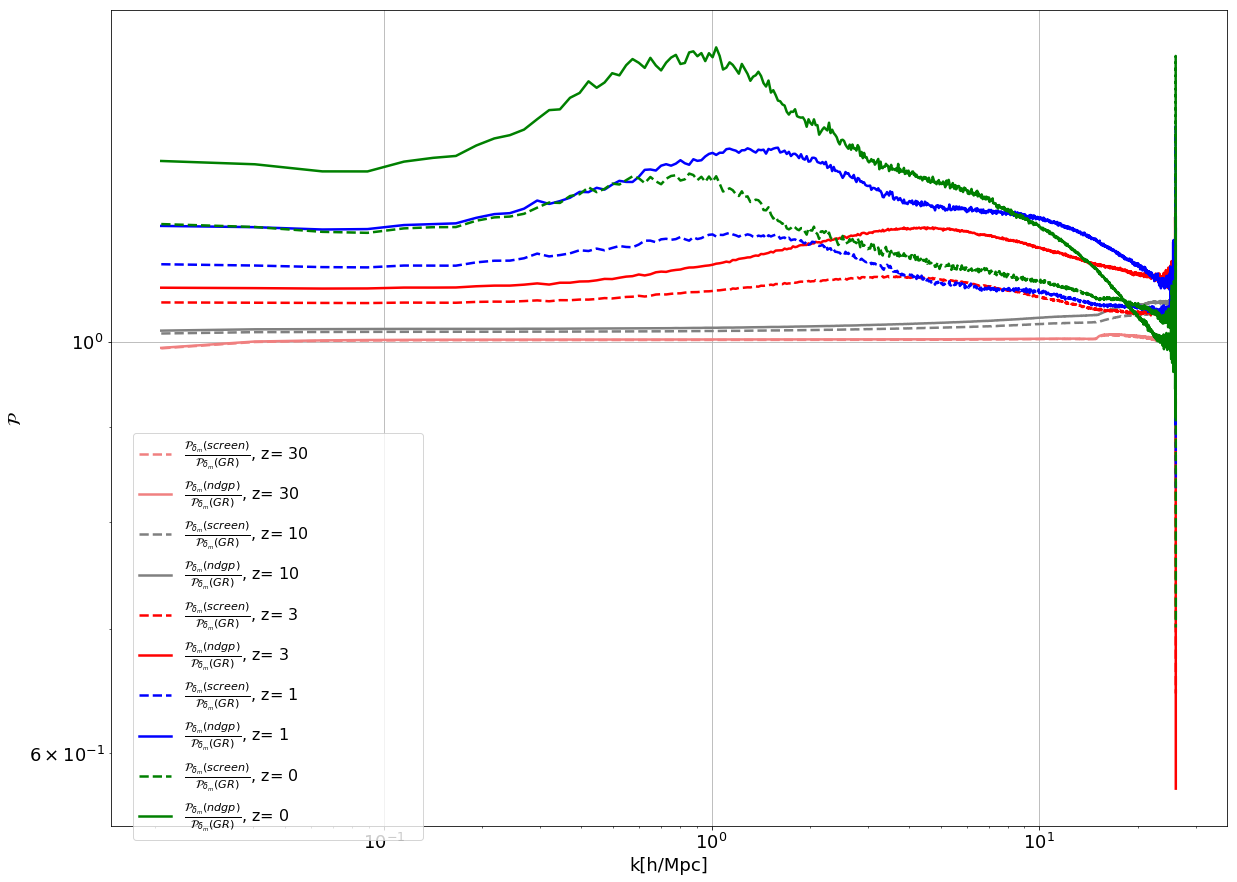

In [30]:
plt.figure(figsize=(20,15))
z_list=[100, 50, 30,10, 3, 1, 0]

plt.figure(1)
#####################
#####################
#####################
#Blue,red,purple,olivedrab,darkblue,salmon,blueviolet,yellowgreen

#SubplotI Check the pi in class and Gevolution
# Hconf*pi comparison
# plt.subplot(211)
ax = plt.gca()
ax.tick_params(axis = 'both', which = 'major', labelsize = 18)
ax.tick_params(axis = 'both', which = 'minor', labelsize = 18)
for i in range (2,7):
    plt.loglog(pow_ndgp_screen_delta_z_all[i][:,0], pow_ndgp_screen_delta_z_all[i][:,1]/pow_GR_delta_z_all[i][:,1],color=ColorsI[i-4],linestyle='dashed',lw=2.5,label=r"$\frac{\mathcal{P}_{\delta_m} (screen)}{\mathcal{P}_{\delta_m} (GR)}$, z= "+str(z_list[i]) )
    plt.loglog(pow_ndgp_delta_z_all[i][:,0], pow_ndgp_delta_z_all[i][:,1]/pow_GR_delta_z_all[i][:,1],color=ColorsI[i-4],linestyle='solid',lw=2.5,label=r"$\frac{\mathcal{P}_{\delta_m} (ndgp)}{\mathcal{P}_{\delta_m} (GR)}$, z= "+str(z_list[i]) )
#     plt.loglog(pow_ndgp_screen_delta_z_all[i][:,0], pow_ndgp_screen_delta_z_all[i][:,1],color=ColorsI[i],linestyle='dashed',lw=2.5,label=r"$\frac{\mathcal{P}_{\delta_m} (screen)}{\mathcal{P}_{\delta_m} (GR)}$, z= "+str(z_list[i]) )
#     plt.loglog(pow_ndgp_screen_delta_z_all[i][:,0], pow_ndgp_delta_z_all[i][:,1],color=ColorsI[i],linestyle='solid',lw=2.5,label=r"$\frac{\mathcal{P}_{\delta_m} (screen)}{\mathcal{P}_{\delta_m} (GR)}$, z= "+str(z_list[i]) )
#     plt.loglog(pow_ndgp_screen_delta_z_all[i][:,0], pow_ndgp_delta_z_all[i][:,1],color=ColorsI[i],linestyle='solid',lw=2.5,label=r"$\frac{\mathcal{P}_{\delta_m} (screen)}{\mathcal{P}_{\delta_m} (GR)}$, z= "+str(z_list[i]) )

#     plt.semilogx(pow_ndgp_delta_z_all[i][:,0], pow_ndgp_screen_delta_z_all[i][:,1]/pow_GR_screen_delta_z_all[i][:,1],color=ColorsI[i],linestyle='solid',lw=2.5,label=r"$\frac{\mathcal{P}_{\delta_m} (ndgp)}{\mathcal{P}_{\delta_m} (GR)}$, z= "+str(z_list[i]) )
#     plt.axvspan(0.6, 14, alpha=0.5, color='pink')
# plt.loglog(power_gr_phi_zall[i+1][:,0], power_gr_phi_zall[i+1][:,1],color="red",linestyle='dashed',lw=2.5, label=r"$\Phi$(ndgp),  z="+str(z_list[i+1]) )
# plt.loglog(pow_ndgp_phi_zall[i+1][:,0], pow_ndgp_phi_zall[i+1][:,1],color="purple",linestyle='solid',lw=2.5,label=r"$\Phi$(GR), z= "+str(z_list[i+1]) )
# ax.hlines(y=1.25, xmin=0.01, xmax=20, linewidth=2, color='black')
# ax.hlines(y=1.15, xmin=0.01, xmax=20, linewidth=2, color='black')


plt.legend(bbox_to_anchor=(0.02, 0.38, 0.26, .102), loc=1,ncol=1,fontsize=16, mode="expand", borderaxespad=0.)
plt.xlabel("k[h/Mpc]",fontsize=18)
plt.ylabel(r"$\mathcal{P} $",fontsize=18)
# plt.xlim(0.0088,20)
# plt.ylim(0,2.5)
plt.grid(True)


# ##Subplot 2
# plt.subplot(212)
# ax = plt.gca()
# ax.tick_params(axis = 'both', which = 'major', labelsize = 18)
# ax.tick_params(axis = 'both', which = 'minor', labelsize = 18)
# for i in range (1,5):
#     plt.loglog(pow_gr_delta_zall[i][:,0], np.abs(pow_ndgp_delta_zall[i][:,1]-pow_gr_delta_zall[i+2][:,1])/pow_gr_delta_zall[i][:,1],color=tableau_color[i],linestyle='dashed',lw=2.5, label=r"$\frac{\mathcal{P}_{\delta_m} (ndgp) - \mathcal{P}_{\delta_m}(GR)}{\mathcal{P}_{\delta_m} (GR)}$,  z="+str(z_list[i]) )
#     plt.axvspan(0.6, 14, alpha=0.5, color='pink')


# plt.legend(bbox_to_anchor=(0.02, 0.88, 0.36, .102), loc=1,ncol=1,fontsize=15, mode="expand", borderaxespad=0.)
# plt.xlabel("k[h/Mpc]",fontsize=18)
# # plt.ylabel(r"$\mathcal{P} $",fontsize=18)
# plt.xlim(0.0088,0.7)
# plt.ylim(1.,1.1)
# plt.grid(True)

# plt.savefig('./Gev-Class_Images/CsCs.jpg', format='jpg', dpi=100)
plt.show()

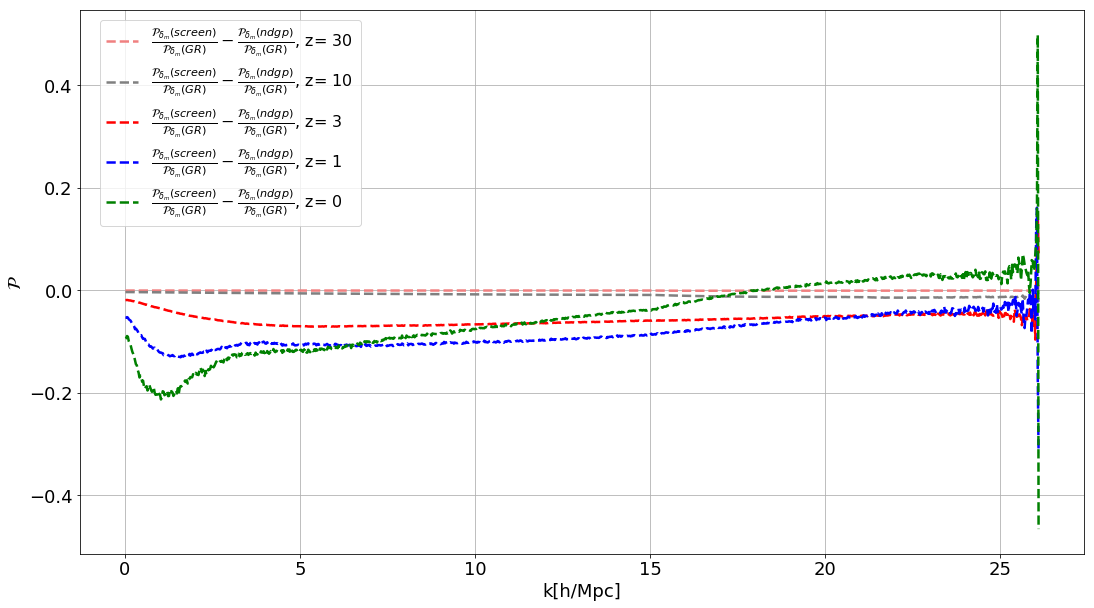

In [33]:
plt.figure(figsize=(18,10))
z_list=[100, 50, 30,10, 3, 1, 0]

plt.figure(1)

ax = plt.gca()
ax.tick_params(axis = 'both', which = 'major', labelsize = 18)
ax.tick_params(axis = 'both', which = 'minor', labelsize = 18)
for i in range (2,7):
    plt.plot(pow_ndgp_screen_delta_z_all[i][:,0],( pow_ndgp_screen_delta_z_all[i][:,1]/pow_GR_delta_z_all[i][:,1]) -(pow_ndgp_delta_z_all[i][:,1]/pow_GR_delta_z_all[i][:,1]) ,color=ColorsI[i-4],linestyle='dashed',lw=2.5,label=r"$\frac{\mathcal{P}_{\delta_m} (screen)}{\mathcal{P}_{\delta_m} (GR)} -\frac{\mathcal{P}_{\delta_m} (ndgp)}{\mathcal{P}_{\delta_m} (GR)} $, z= "+str(z_list[i]) )
#     plt.loglog(pow_ndgp_delta_z_all[i][:,0], pow_ndgp_delta_z_all[i][:,1]/pow_GR_delta_z_all[i][:,1],color=ColorsI[i-4],linestyle='solid',lw=2.5,label=r"$\frac{\mathcal{P}_{\delta_m} (ndgp)}{\mathcal{P}_{\delta_m} (GR)}$, z= "+str(z_list[i]) )


plt.legend(bbox_to_anchor=(0.02, 0.88, 0.26, .102), loc=1,ncol=1,fontsize=16, mode="expand", borderaxespad=0.)
plt.xlabel("k[h/Mpc]",fontsize=18)
plt.ylabel(r"$\mathcal{P} $",fontsize=18)
# plt.xlim(0.0088,20)
# plt.ylim(0,2.5)
plt.grid(True)


# plt.savefig('./Gev-Class_Images/CsCs.jpg', format='jpg', dpi=100)
plt.show()

#### Phi power spectrum Plots

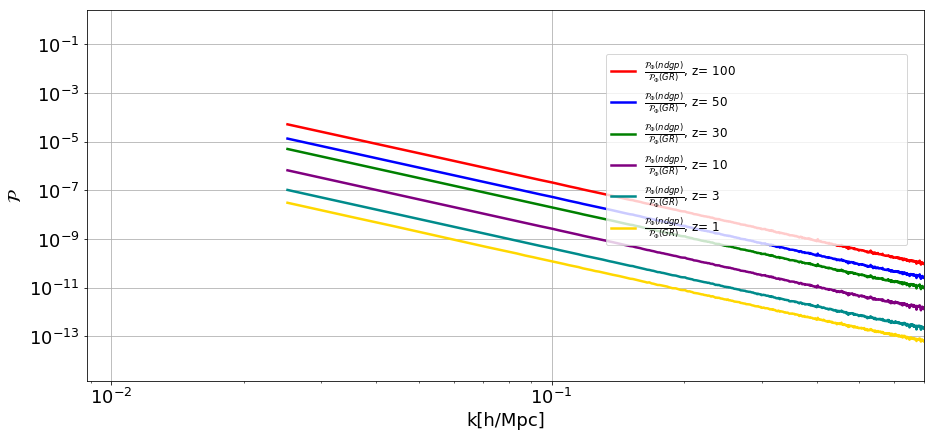

In [18]:
plt.figure(figsize=(15,15))
z_list=[100, 50, 30,10, 3, 1, 0]

plt.figure(1)
#####################
#####################
#####################
#Blue,red,purple,olivedrab,darkblue,salmon,blueviolet,yellowgreen

#SubplotI Check the pi in class and Gevolution
# Hconf*pi comparison
x = np.linspace(0, 10, 1000)

plt.subplot(211)
ax = plt.gca()
ax.tick_params(axis = 'both', which = 'major', labelsize = 18)
ax.tick_params(axis = 'both', which = 'minor', labelsize = 18)
for i in range (0,maxNum-1):
#     plt.loglog(pow_gr_phi_zall[i][:,0], pow_gr_phi_zall[i][:,1],color=tableau20[i],linestyle='dashed',lw=2.5, label=r"$\Phi$(ndgp),  z="+str(z_list[i]) )
    plt.loglog(pow_ndgp_phi_z_all[i][:,0], pow_ndgp_screen_phi_z_all[i][:,1]/pow_GR_screen_delta_z_all[i][:,1],color=ColorsI[i],linestyle='solid',lw=2.5,label=r"$\frac{\mathcal{P}_{\Phi}(ndgp)}{\mathcal{P}_{\Phi}(GR)}$, z= "+str(z_list[i]) )
    plt.axvspan(0., 14, alpha=0.5, color='pink')

# plt.loglog(power_gr_phi_zall[i+1][:,0], power_gr_phi_zall[i+1][:,1],color="red",linestyle='dashed',lw=2.5, label=r"$\Phi$(ndgp),  z="+str(z_list[i+1]) )
# plt.loglog(pow_ndgp_phi_zall[i+1][:,0], pow_ndgp_phi_zall[i+1][:,1],color="purple",linestyle='solid',lw=2.5,label=r"$\Phi$(GR), z= "+str(z_list[i+1]) )

plt.legend(bbox_to_anchor=(0.62, 0.78, 0.36, .102), loc=1,ncol=1,fontsize=12, mode="expand", borderaxespad=0.)
plt.xlabel("k[h/Mpc]",fontsize=18)
plt.ylabel(r"$\mathcal{P} $",fontsize=18)
plt.xlim(0.0088,0.7)
plt.ylim(0.,2.5)
plt.grid(True)


# ##Subplot 2
# plt.subplot(212)
# ax = plt.gca()
# ax.tick_params(axis = 'both', which = 'major', labelsize = 18)
# ax.tick_params(axis = 'both', which = 'minor', labelsize = 18)
# for i in range (2,5):
#     plt.loglog(pow_gr_phi_zall[i][:,0], np.abs(pow_ndgp_phi_zall[i][:,1]-pow_gr_phi_zall[i+2][:,1])/pow_gr_phi_zall[i][:,1],color=tableau_color[i],linestyle='dashed',lw=2.5, label=r"$|\frac{\mathcal{P}_{\Phi}(ndgp) - \mathcal{P}_{\Phi} (GR)}{\mathcal{P}_{\Phi}(GR)}|$,  z="+str(z_list[i]) )
#     plt.axvspan(0.6, 14, alpha=0.5, color='pink')



# plt.legend(bbox_to_anchor=(0.02, 0.88, 0.36, .102), loc=1,ncol=1,fontsize=12, mode="expand", borderaxespad=0.)
# plt.xlabel("k[h/Mpc]",fontsize=18)
# # plt.ylabel(r"$\mathcal{P} $",fontsize=18)
# plt.xlim(0.0088,0.7)
# # plt.ylim(1.e-15,1.e-9)
# plt.grid(True)


# plt.savefig('./Gev-Class_Images/CsCs.jpg', format='jpg', dpi=100)
plt.show()